In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^4-z^2+1}{4z^3-2z}$$

of the Newton-Raphson method for the equation $z^4-z^2+1=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [2]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return (3*z*z*z*z - z*z - 1)/(2*z*(2*z*z - 1))
#cubic roots of 1
zz=[complex(0.866025403784439,0.5),complex(-0.866025403784439,0.5),complex(0.866025403784439,-0.5),complex(-0.866025403784439,-0.5)]
#corresponding colors
cc=[[1,0,0],[0,1,.5],[0,0,1], [.5,.5,0]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Newton-Raphson iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the cuurent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

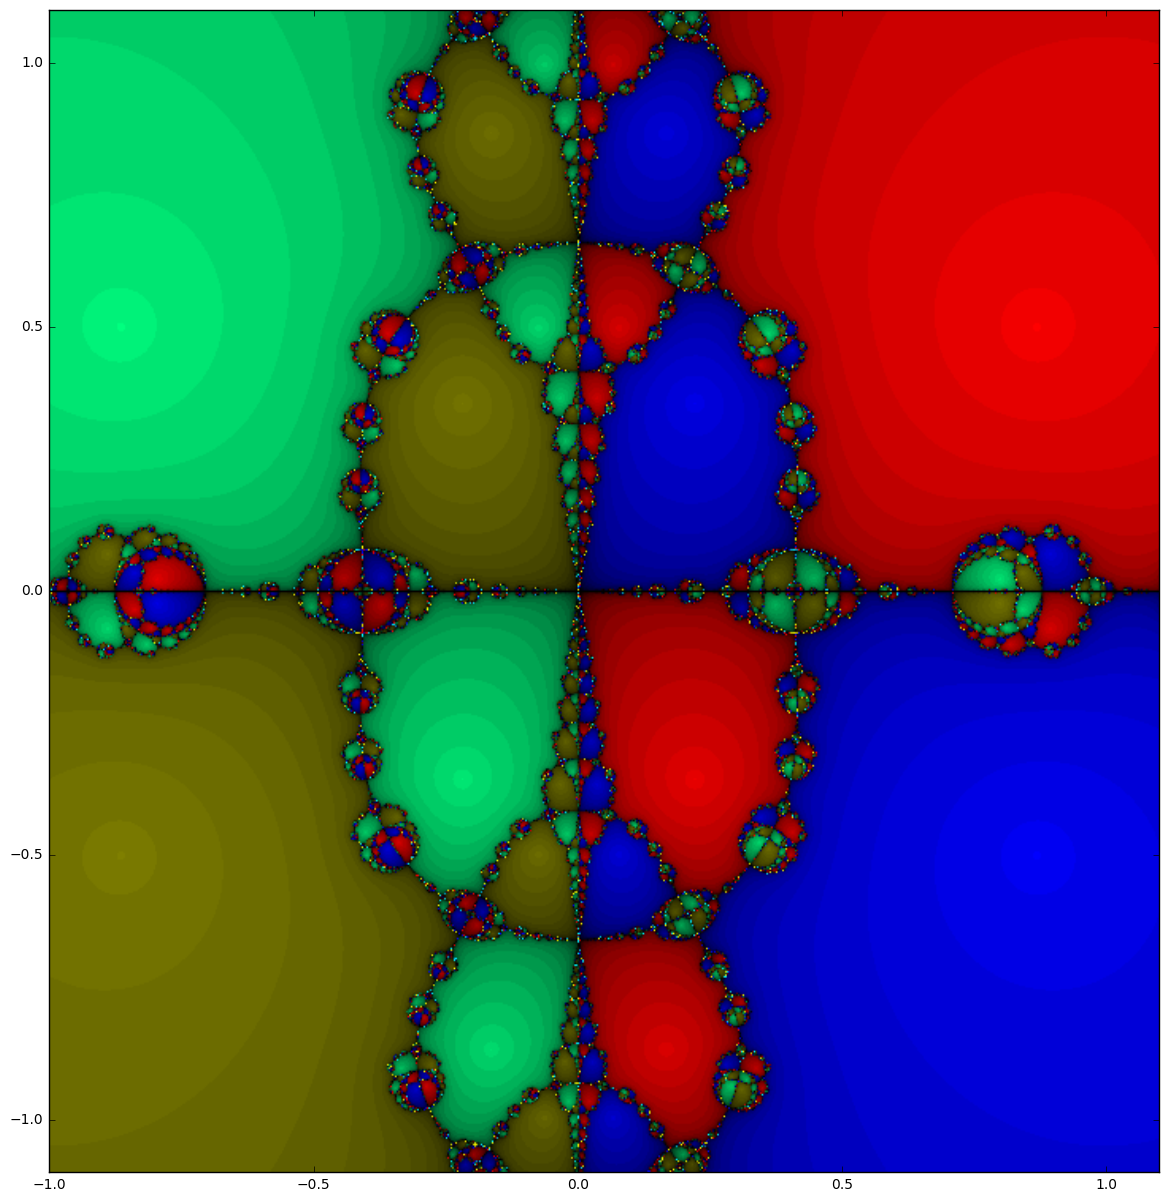

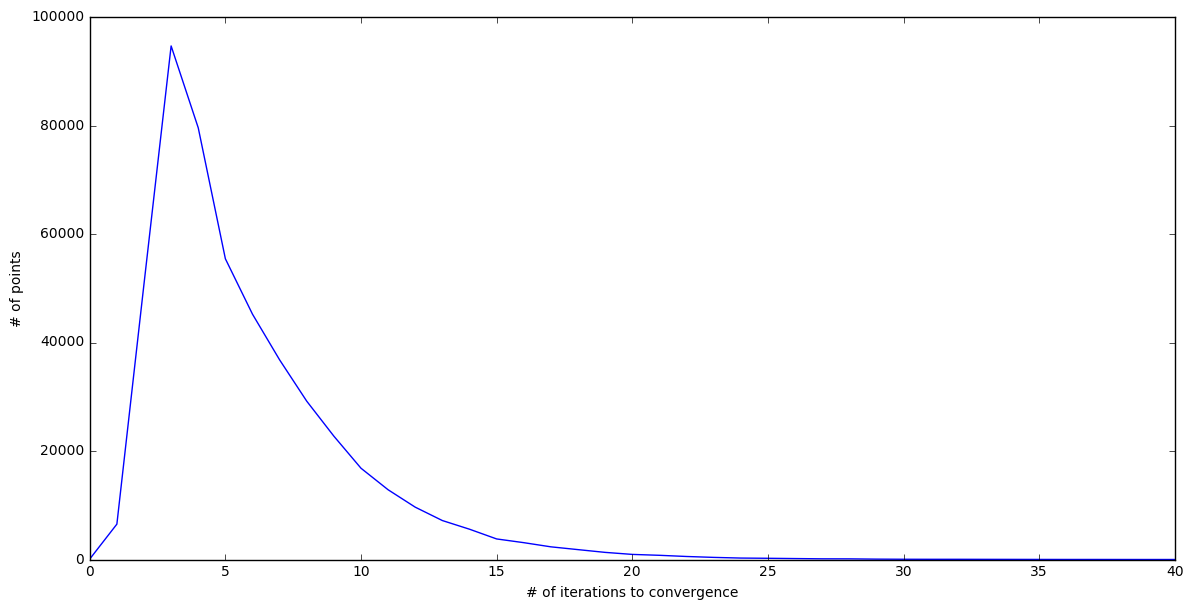

In [3]:
xmin = -1
xmax = 1.1
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

(-1+0j)


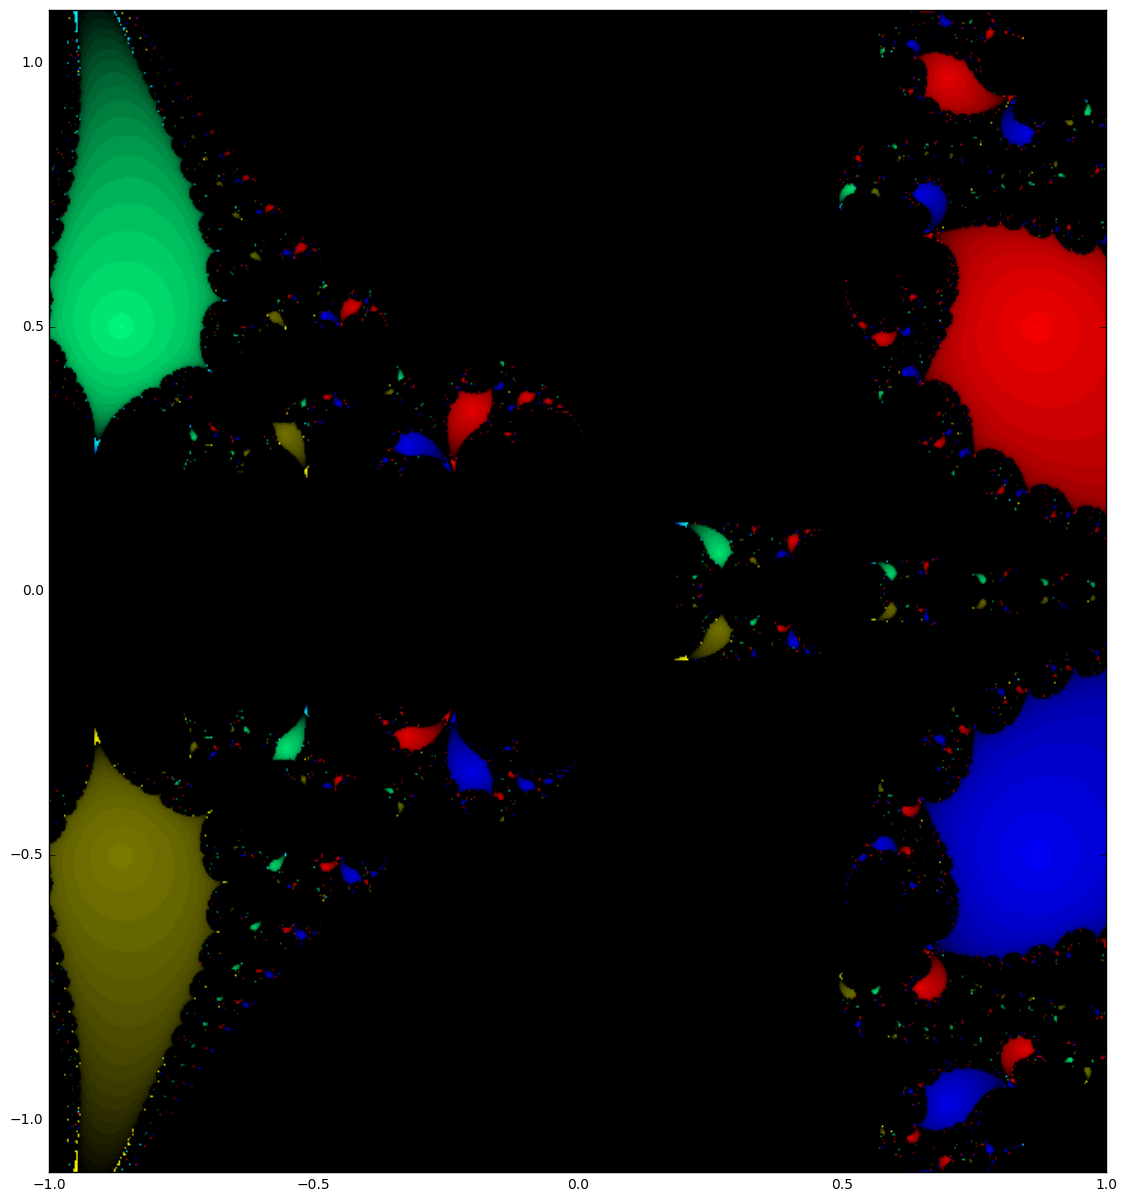

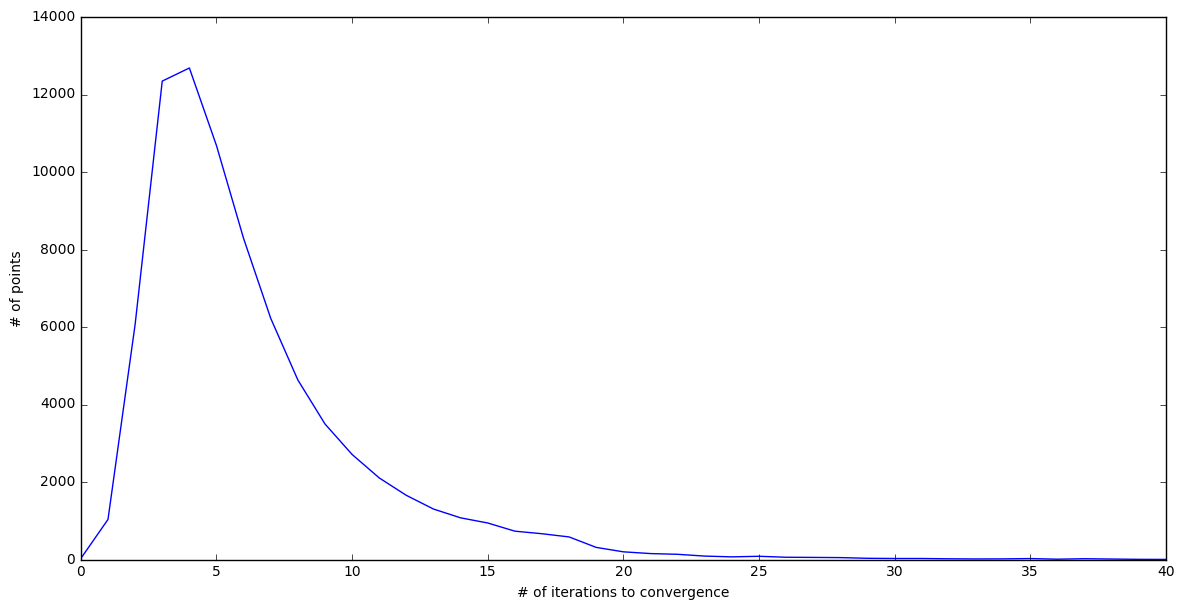

In [10]:
# Implementing Stephensen's method
def poly(z):
    return z*z*z*z -z*z + 1
def phiS(z, omega):
    z, omega = complex(z), complex(omega)
    return z-(omega*poly(z)**2)/(poly(z+omega*poly(z)) - poly(z))

omega = 1
xmin = -1
xmax = 1
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            try:
                z=phiS(z0, omega)
            except ZeroDivisionError:
                print(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

In this graph, there are lots of black spaces, so we can conclude that this is slower convergence than the Newton-Raphson method. We also observe that the graph is no longer symmetric.

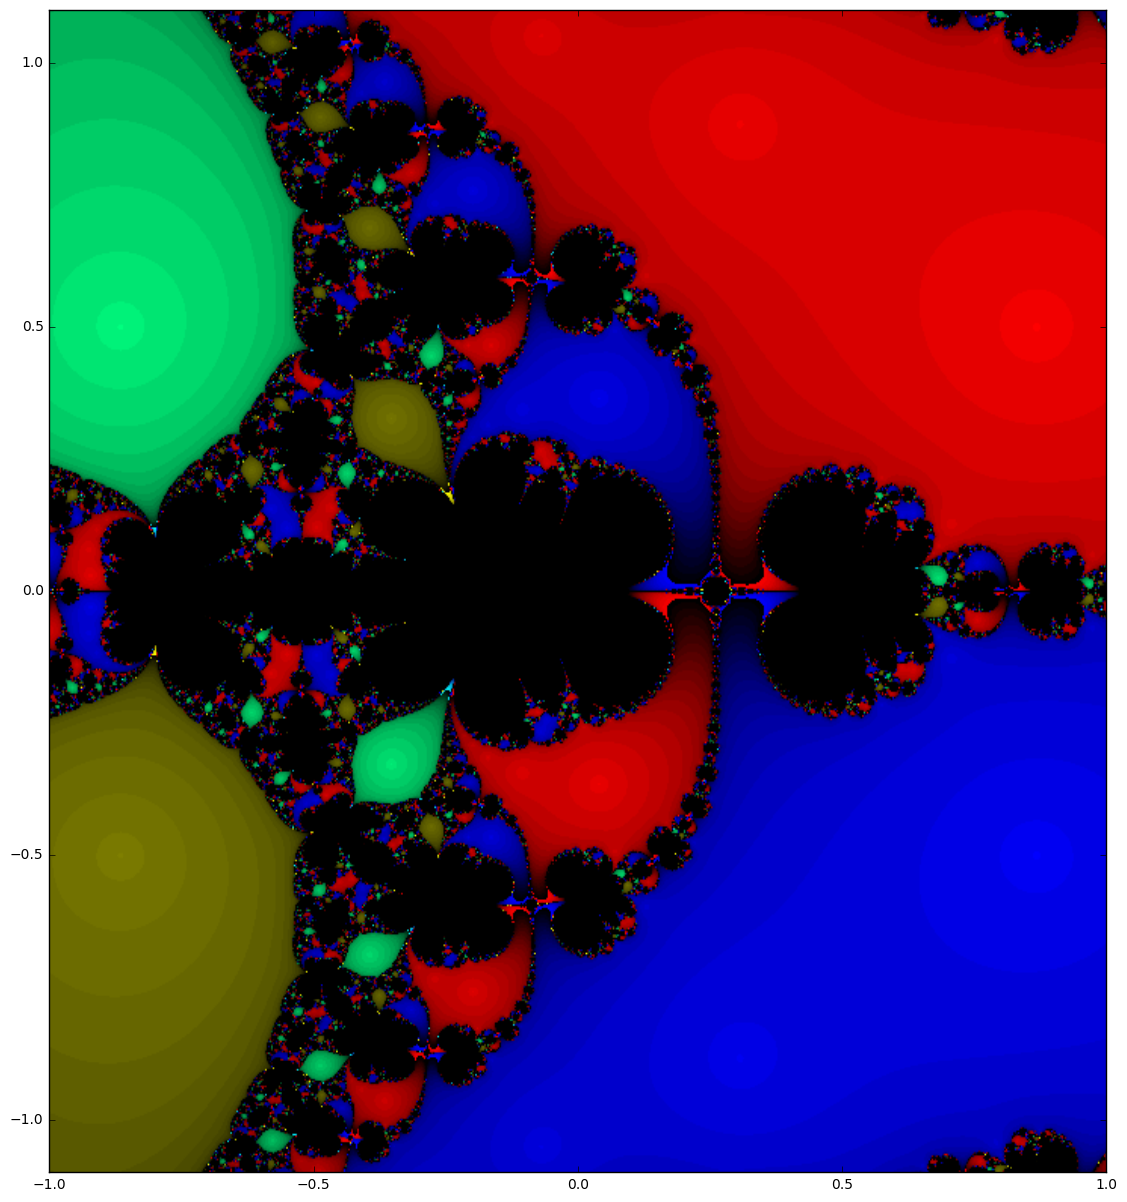

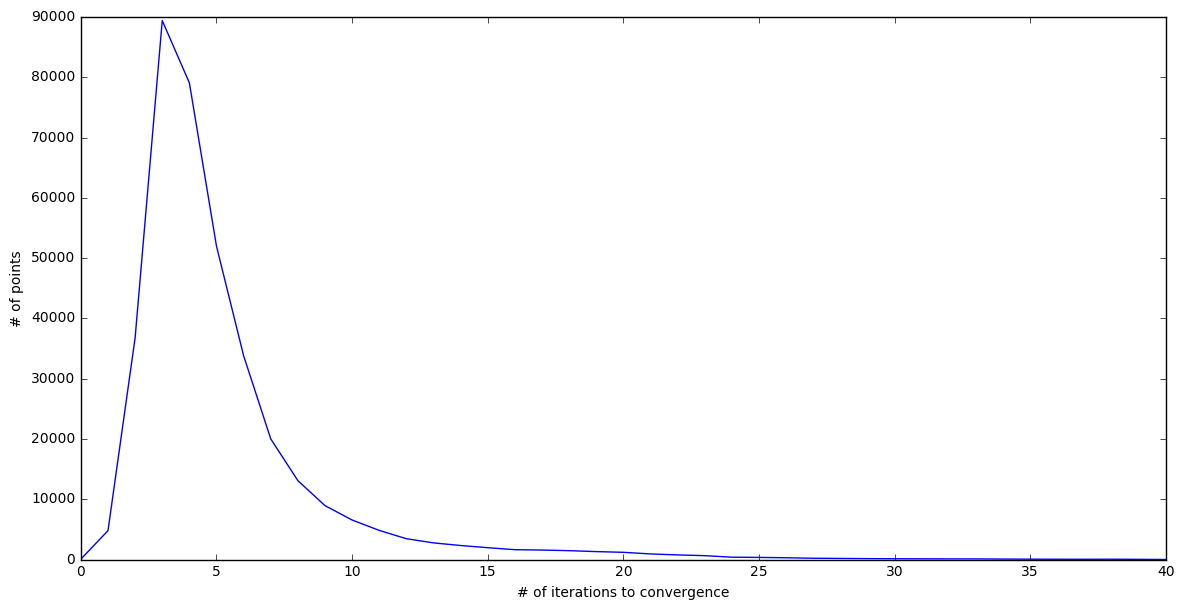

In [4]:
# Implementing Stephensen's method
def poly(z):
    return z*z*z*z -z*z + 1
def phiS(z, omega):
    z, omega = complex(z), complex(omega)
    return z-(omega*poly(z)**2)/(poly(z+omega*poly(z)) - poly(z))

omega = 0.3
xmin = -1
xmax = 1
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            try:
                z=phiS(z0, omega)
            except ZeroDivisionError:
                print(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

When $\omega = 0.3$, we get less black spaces and the roots on the right have bigger convergence regions than the ones on the left.

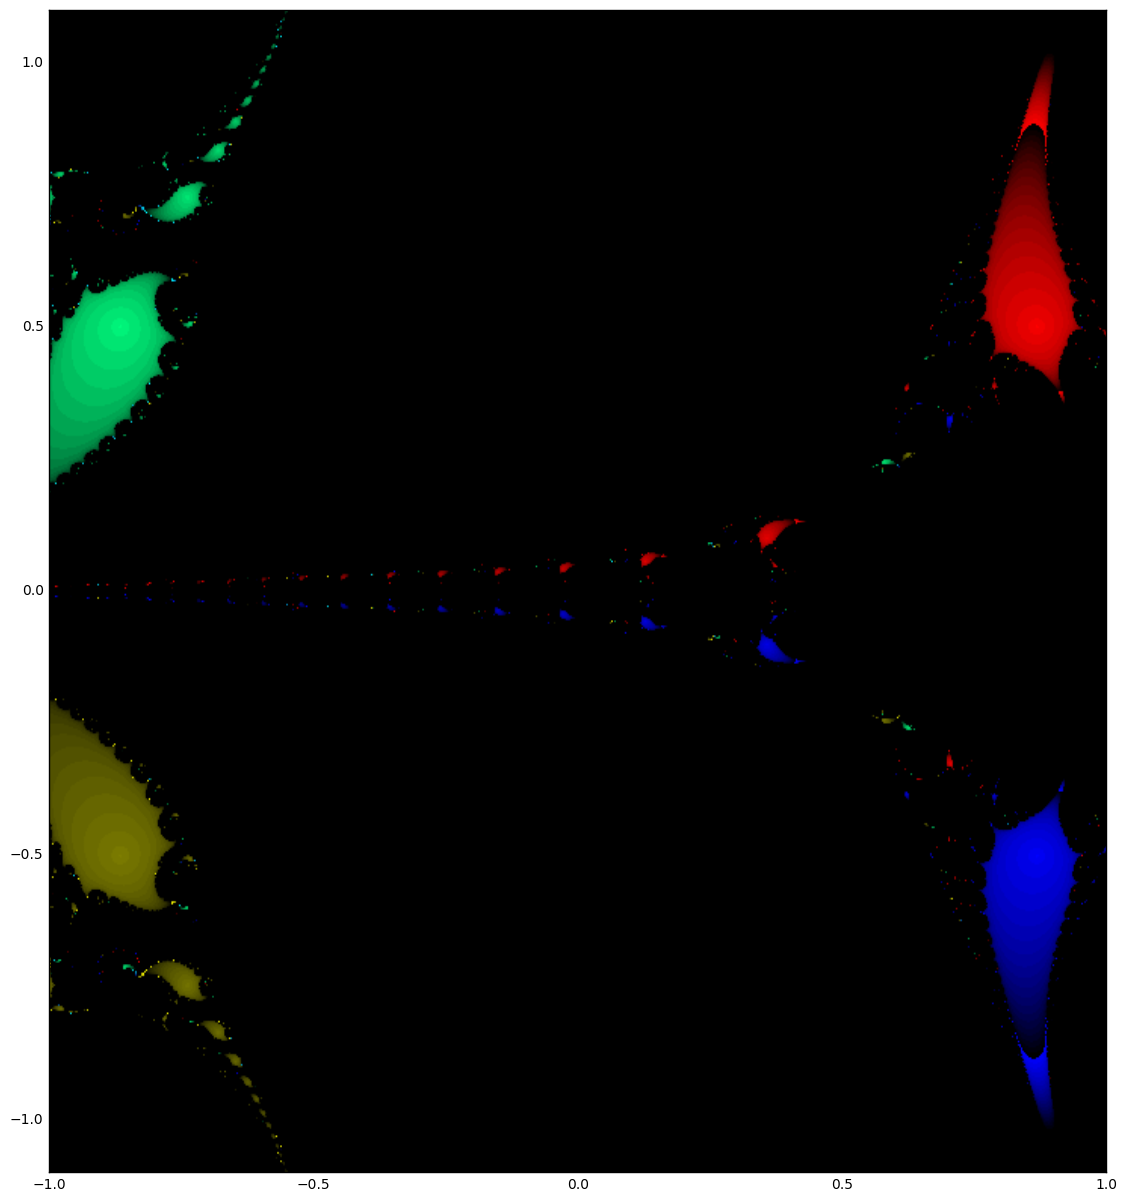

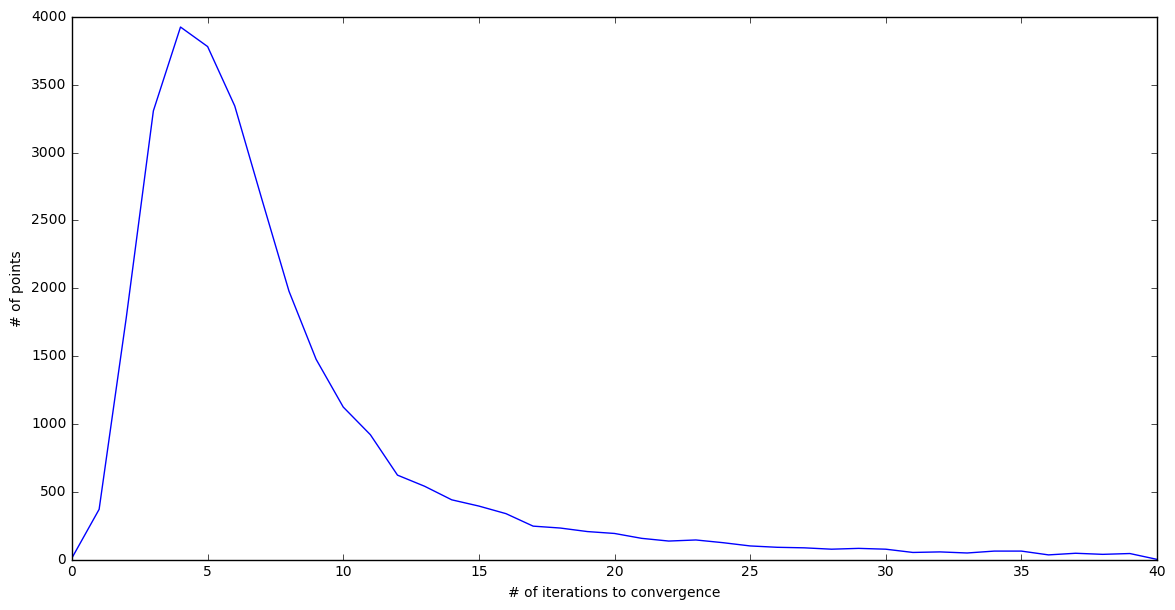

In [7]:
omega = -2
xmin = -1
xmax = 1
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            try:
                z=phiS(z0, omega)
            except ZeroDivisionError:
                print(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

For $\omega = -2$, we have even more black spaces and not a lot of points converge rapidly.

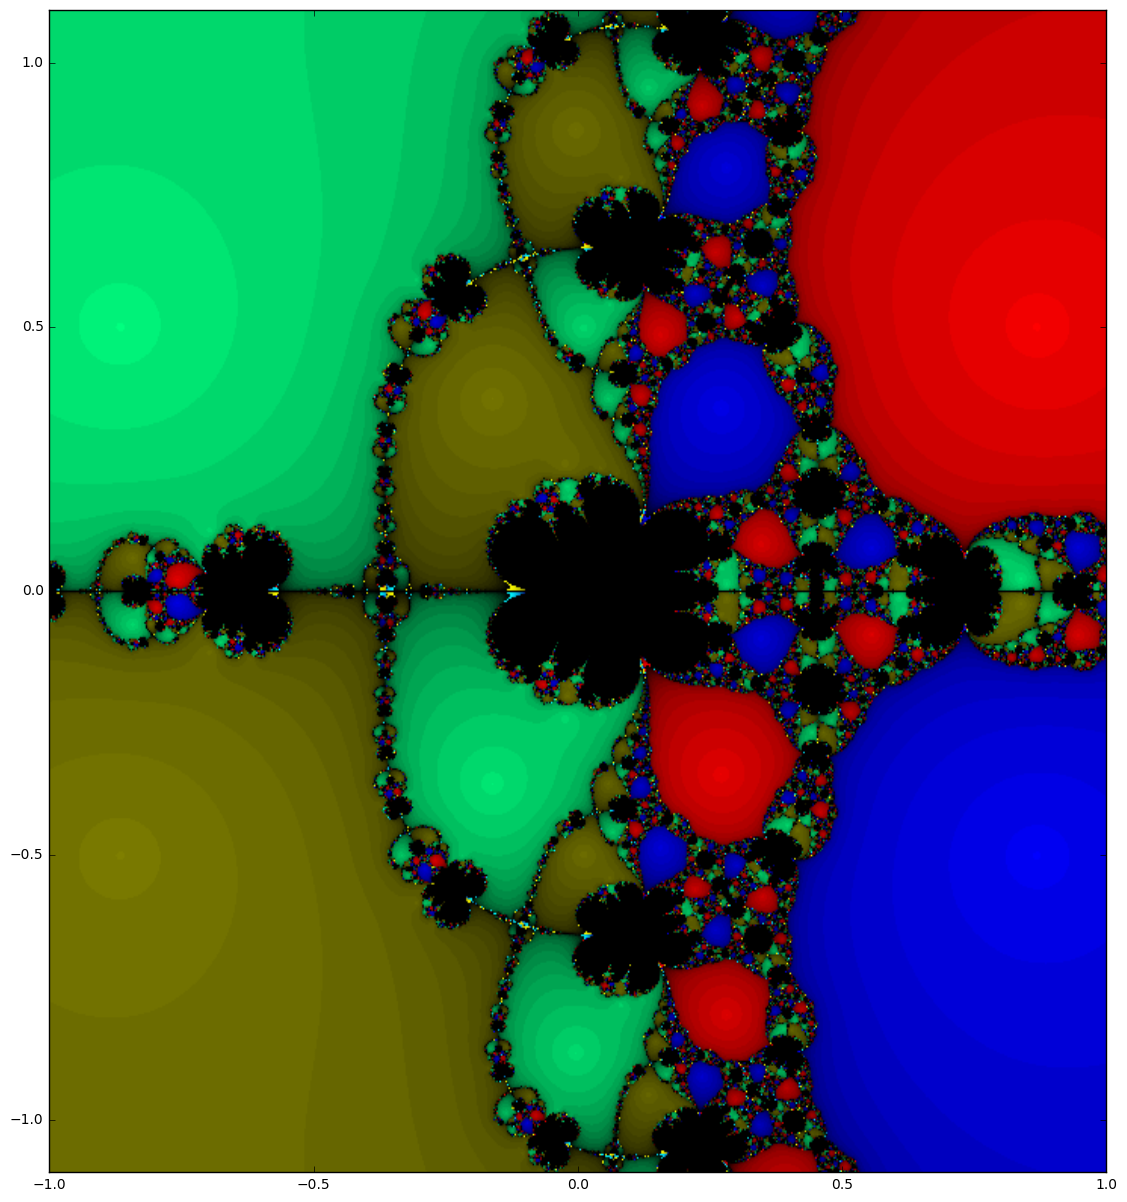

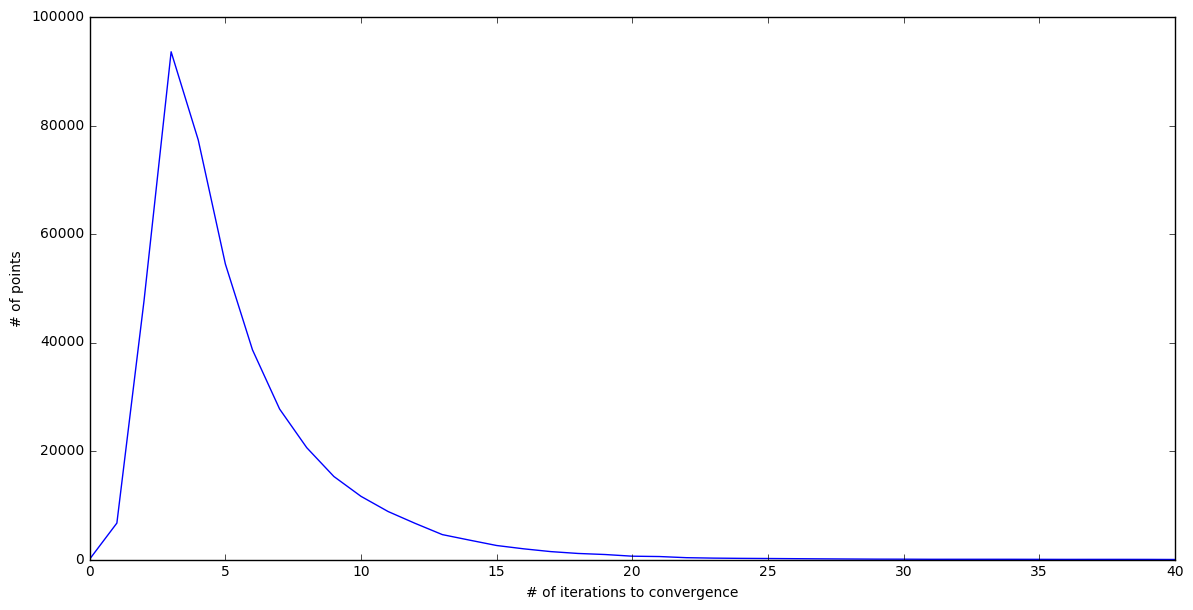

In [8]:
omega = -0.1
xmin = -1
xmax = 1
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            try:
                z=phiS(z0, omega)
            except ZeroDivisionError:
                print(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

For $\omega = 0.1$, we have more complicated boundaries with more fractals and we get closer to a symmetric image like in the Newton-Raphson method.

# Quadratic Convergence of Steffensen (2.5)

From the notes on Newton-Raphson, we know that we only need to show that $\phi'(x_0) = 0$ when $f(x_0) = 0$ i.e: $x_0$ is a root. However, $\phi$ is not defined at $x_0$, so we first argue that $\phi(x_0) = x_0$.

\begin{aligned}
  \lim_{z\rightarrow x_0} \phi(z) &= \lim_{z\rightarrow x_0} z- \frac{\omega\cdot (f(z))^2}{f(z+\omega f(z)) - f(z)}\\
  &= x_0 - \lim_{z\rightarrow x_0} \frac{2\omega f(x) f'(z)}{f'(z+\omega f(z))(1+\omega f'(z)) - f'(z)} &&\text{Using Hospital's rule}\\
  &= x_0 = \lim_{z \rightarrow x_0} \frac{2\omega f(z)}{\omega f'(z)} &&\text{Using } \lim_{z \rightarrow x_0} f(z) = 0\\
  & = x_0 &&\text{ Assuming } \lim_{z\rightarrow x_0} \neq 0
\end{aligned}

It is left to prove that the derivative is 0.
$$\phi'(x_0) = \lim_{z \rightarrow x_0}\frac{\phi(z) -\phi(x_0)}{z-x_0} = \lim_{z \rightarrow x_0}\frac{\phi(z) -x_0}{z-x_0} $$